## Correlation between wind speed and 

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="whitegrid", color_codes=True)

In [9]:
from functions import rplot

In [10]:
dfnov = pd.read_csv('./data/pblh_nov.csv')
dfdec = pd.read_csv('./data/pblh_dec.csv')
dfjan = pd.read_csv('./data/pblh_jan.csv')

In [11]:
metnov = pd.read_csv('./data/met_data_nov_utc.csv')
metdec = pd.read_csv('./data/met_data_dec_utc.csv')
metjan = pd.read_csv('./data/met_data_jan_utc.csv')

In [12]:
dfnov['datetime'] = pd.to_datetime(dfnov.datetime)
dfnov = dfnov.drop(['date', 'time'], axis=1)

dfdec['datetime'] = pd.to_datetime(dfdec.datetime)
dfjan['datetime'] = pd.to_datetime(dfjan.datetime)

In [13]:
dfnov = dfnov.set_index(dfnov.datetime)
dfdec = dfdec.set_index(dfdec.datetime)
dfjan = dfjan.set_index(dfjan.datetime)

In [14]:
dfnov = dfnov.rename(columns= {
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfdec = dfdec.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfjan = dfjan.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

In [15]:
dfnov00 = dfnov.iloc[0::2,:]
dfnov12 = dfnov.iloc[1::2,:]
dfdec00 = dfdec.iloc[0::2,:]
dfdec12 = dfdec.iloc[1::2,:]
dfjan00 = dfjan.iloc[0::2,:]
dfjan12 = dfjan.iloc[1::2,:]

In [16]:
metnov['datetime'] = pd.to_datetime(metnov.date) + pd.to_timedelta(metnov.hour)
metdec['datetime'] = pd.to_datetime(metdec.time)
metjan['datetime'] = pd.to_datetime(metjan.datetime)

In [17]:
metnov = metnov.set_index(metnov.datetime)
metdec = metdec.set_index(metdec.datetime)
metjan = metjan.set_index(metjan.datetime)

metnov.drop(['date', 'hour', 'datetime'], axis=1, inplace=True)
metdec.drop(['time', 'datetime'], axis=1, inplace=True)
metjan.drop(['datetime'], axis=1, inplace=True)

In [18]:
# Add the missing values of datetime in November and December as NaN

idx_nov = pd.date_range('2020-11-01 00:00:00','2020-11-30 23:00:00', freq='H')
idx_dec = pd.date_range('2020-12-01 00:00:00','2020-12-31 23:00:00', freq='H')

metnov = metnov.reindex(idx_nov, fill_value=np.nan)
metdec = metdec.reindex(idx_dec, fill_value=np.nan)

In [19]:
met = pd.concat([metnov, metdec, metjan], axis=0)

In [27]:
dfdec00.shape

(31, 3)

In [24]:
metnov00 = metnov[metnov.index.hour == 0]
metnov12 = metnov[metnov.index.hour == 12]

metdec00 = metdec[metdec.index.hour == 0]
metdec12 = metdec[metdec.index.hour == 12]

metjan00 = metjan[metjan.index.hour == 0]
metjan12 = metjan[metjan.index.hour == 12]

In [28]:
metdec12.shape

(31, 9)

In [46]:
met_pblh_nov00 = pd.concat([metnov00, dfnov00], axis=1)
met_pblh_dec00 = pd.concat([metdec00, dfdec00], axis=1)
met_pblh_jan00 = pd.concat([metjan00, dfjan00], axis=1)

met_pblh_nov12 = pd.concat([metnov12, dfnov12], axis=1)
met_pblh_dec12 = pd.concat([metdec12, dfdec12], axis=1)
met_pblh_jan12 = pd.concat([metjan12, dfjan12], axis=1)

In [57]:
met_pblh_nov00 = met_pblh_nov00[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]
met_pblh_dec00 = met_pblh_dec00[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]
met_pblh_jan00 = met_pblh_jan00[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]

met_pblh_nov12 = met_pblh_nov12[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]
met_pblh_dec12 = met_pblh_dec12[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]
met_pblh_jan12 = met_pblh_jan12[['mod_ws', 'obs_ws', 'mod_pbl', 'obs_pbl']]

In [62]:
met_pblh_nov00.head()

,mod_ws,obs_ws,mod_pbl,obs_pbl
2020-11-01,NaN,NaN,NaN,159.0
2020-11-02,NaN,NaN,NaN,250.0
2020-11-03,NaN,NaN,NaN,185.0
2020-11-04,1.34306,1.899972,75.59265,168.0
2020-11-05,1.53860,0.491806,72.55289,142.0


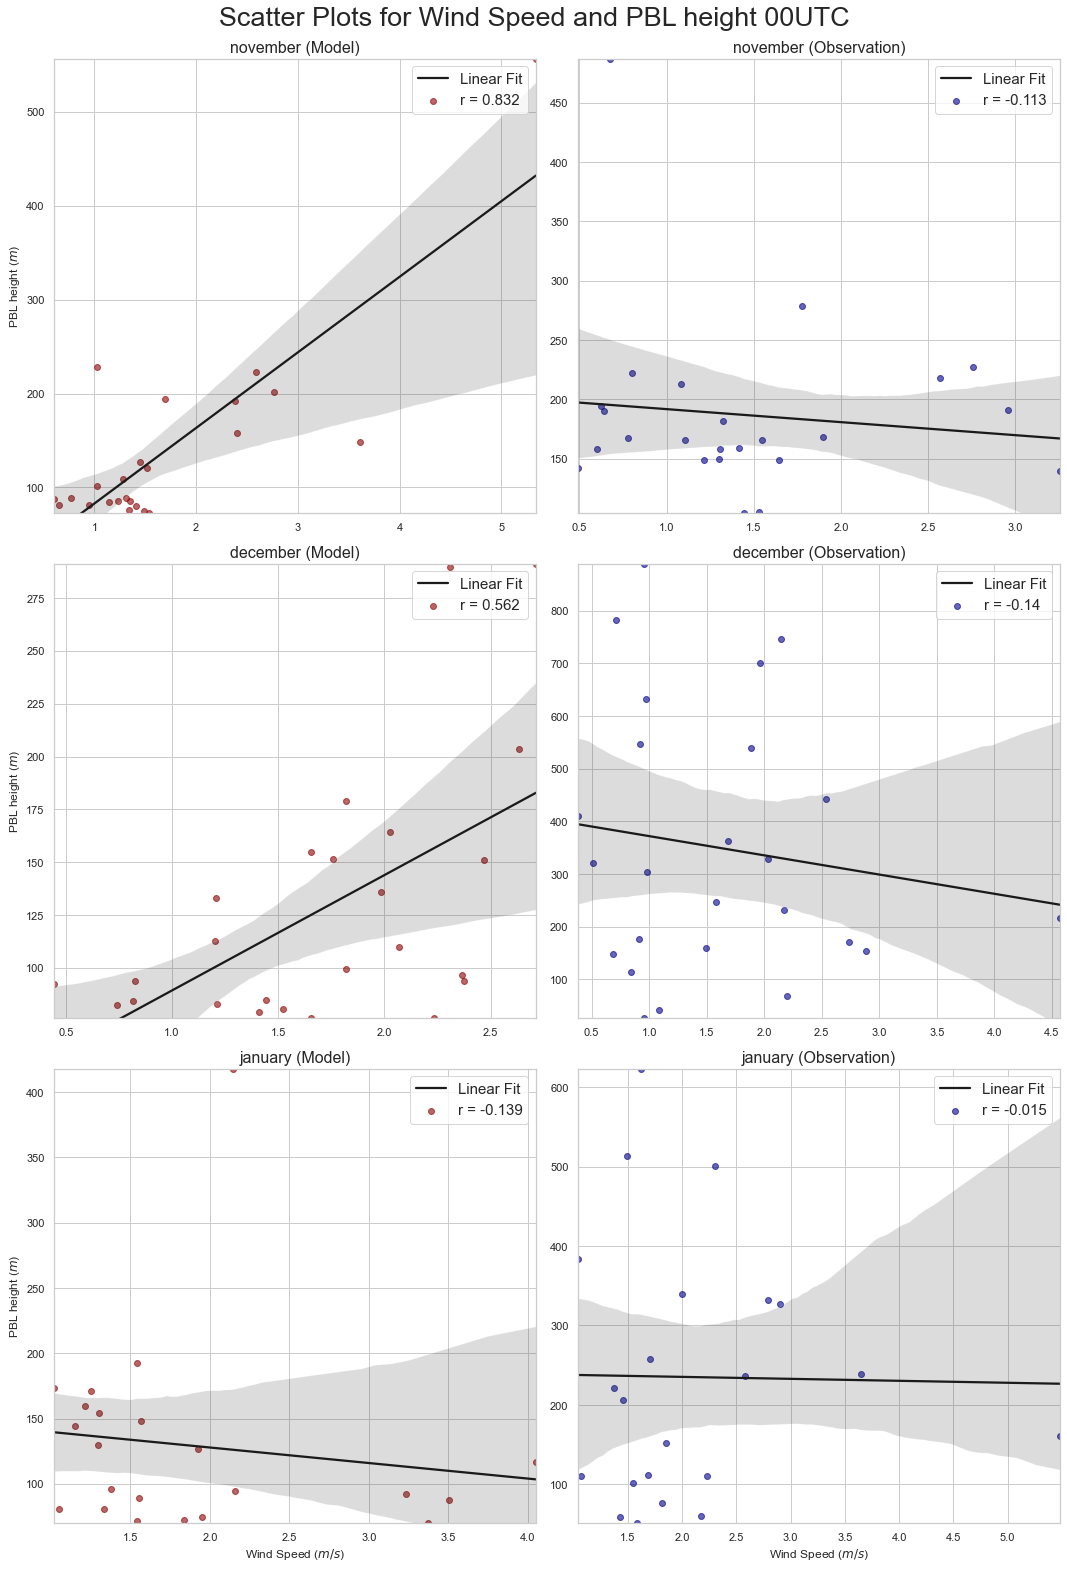

In [59]:
# Scatter-Correlation plot wind speed and pblh for model and observation at 00UTC

fig = plt.figure(figsize=(15,22))

# november
plt.subplot(321)
rplot.plot(met_pblh_nov00, met_pblh_nov00.dropna()['mod_ws'], met_pblh_nov00.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("november (Model)", fontsize=16)

plt.subplot(322)
rplot.plot(met_pblh_nov00, met_pblh_nov00.dropna()['obs_ws'], met_pblh_nov00.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("november (Observation)", fontsize=16)

# december
plt.subplot(323)
rplot.plot(met_pblh_dec00, met_pblh_dec00.dropna()['mod_ws'], met_pblh_dec00.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("december (Model)", fontsize=16)

plt.subplot(324)
rplot.plot(met_pblh_dec00, met_pblh_dec00.dropna()['obs_ws'], met_pblh_dec00.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("december (Observation)", fontsize=16)

# january
plt.subplot(325)
rplot.plot(met_pblh_jan00, met_pblh_jan00.dropna()['mod_ws'], met_pblh_jan00.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("january (Model)", fontsize=16)

plt.subplot(326)
rplot.plot(met_pblh_jan00, met_pblh_jan00.dropna()['obs_ws'], met_pblh_jan00.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("january (Observation)", fontsize=16)

fig.suptitle('Scatter Plots for Wind Speed and PBL height 00UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/extra/rplot_ws_pblh00.png')

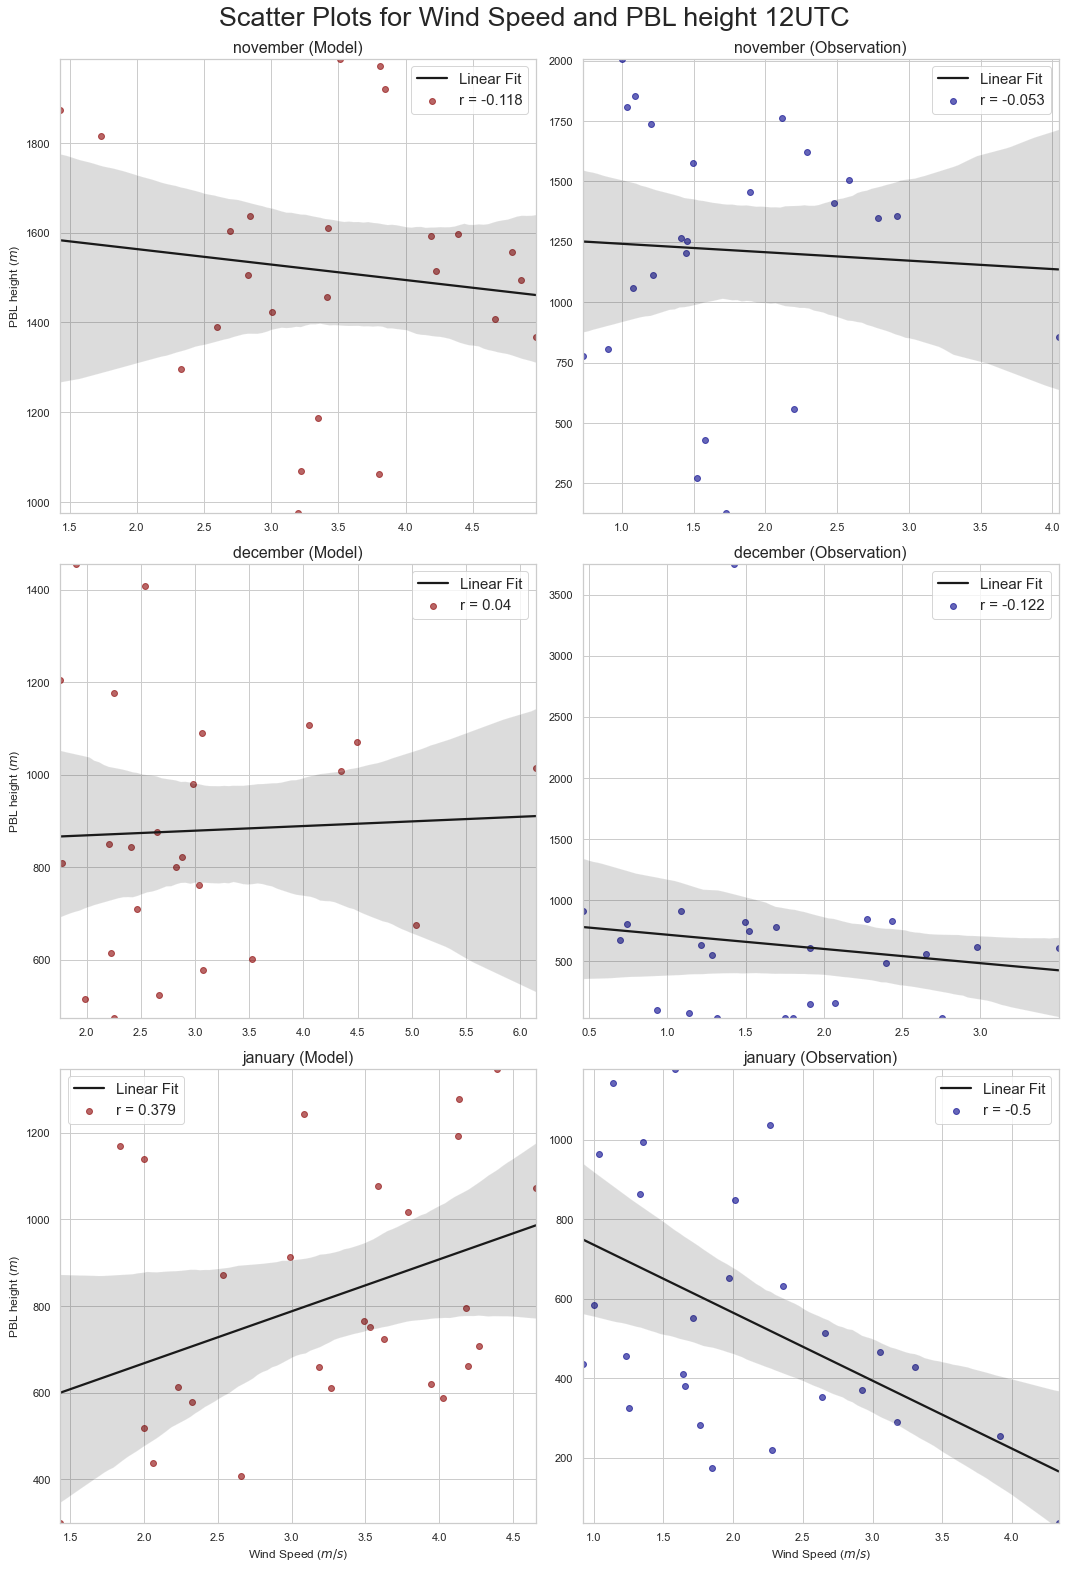

In [60]:
# Scatter-Correlation plot wind speed and pblh for model and observation at 12UTC

fig = plt.figure(figsize=(15,22))

# november
plt.subplot(321)
rplot.plot(met_pblh_nov12, met_pblh_nov12.dropna()['mod_ws'], met_pblh_nov12.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("november (Model)", fontsize=16)

plt.subplot(322)
rplot.plot(met_pblh_nov12, met_pblh_nov12.dropna()['obs_ws'], met_pblh_nov12.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("november (Observation)", fontsize=16)

# december
plt.subplot(323)
rplot.plot(met_pblh_dec12, met_pblh_dec12.dropna()['mod_ws'], met_pblh_dec12.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("december (Model)", fontsize=16)

plt.subplot(324)
rplot.plot(met_pblh_dec12, met_pblh_dec12.dropna()['obs_ws'], met_pblh_dec12.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Wind Speed ($^{o}C$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("december (Observation)", fontsize=16)

# january
plt.subplot(325)
rplot.plot(met_pblh_jan12, met_pblh_jan12.dropna()['mod_ws'], met_pblh_jan12.dropna()['mod_pbl'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
plt.ylabel("PBL height ($m$)", fontsize=12)
plt.title("january (Model)", fontsize=16)

plt.subplot(326)
rplot.plot(met_pblh_jan12, met_pblh_jan12.dropna()['obs_ws'], met_pblh_jan12.dropna()['obs_pbl'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
# plt.ylabel("PBL height ($\mu g/m^3$)", fontsize=12)
plt.title("january (Observation)", fontsize=16)

fig.suptitle('Scatter Plots for Wind Speed and PBL height 12UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/extra/rplot_ws_pblh12.png')